# Predicting Car Prices Using Machine Learning

In [ ]:
# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

sns.set_theme(palette="Set2")

In [ ]:
df_final = pd.read_csv("/content/DM1.csv")
df_final.head()

,monthly_mileage,Weight,Age,Cylinder_Numbers,Price,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Condition_Fair,Condition_Good,Navigation_Yes,Service_History_No Service,Service_History_Partial Service,Sunroof_Yes
0,3020.474750,3170.0,17.0,2.0,8005.469674,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,894.742606,3543.0,5.0,2.0,25385.241860,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3496.160436,3125.0,20.0,3.0,6553.601733,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1037.247974,3340.0,4.0,3.0,24381.083350,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,880.045753,3847.0,7.0,5.0,28357.830640,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df_final, test_size=0.2, random_state=7)
print(f"{trainset.shape[0]} training and {testset.shape[0]} test instances")

1784 training and 446 test instances


In [ ]:
# separate predictors and target
ytrain = trainset["Price"].copy()
Xtrain = trainset.drop("Price", axis=1)
ytest = testset["Price"].copy()
Xtest = testset.drop("Price", axis=1)


## Outliers Detection

Use the Isolation Forest method to remove 5% of the outliers.

In [ ]:
# check the size of the Xtrain and Xtest datasets
Xtrain.shape, Xtest.shape

((1784, 13), (446, 13))

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, random_state=0, contamination=0.05).fit(Xtrain)
yhat = clf.predict(Xtrain)
Xtrain = Xtrain[yhat != -1]
ytrain = ytrain[yhat != -1]
Xtrain.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(1694, 13)

In [ ]:
yhat = clf.predict(Xtest)
Xtest = Xtest[yhat == 1]
ytest = ytest[yhat != -1]
Xtest.shape


(421, 13)

Use StandardScaler to scale all features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform returns a NumPy array, so we need to put it back
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(Xtrain)
Xtrain = pd.DataFrame(scaled_vals, columns=Xtrain.columns)

# inspect the data
Xtrain.head()

,monthly_mileage,Weight,Age,Cylinder_Numbers,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Condition_Fair,Condition_Good,Navigation_Yes,Service_History_No Service,Service_History_Partial Service,Sunroof_Yes
0,-0.886309,0.464897,-0.960357,1.174786,-0.687782,-0.906369,0.606907,-0.580531,-1.243933,0.645281,-0.605086,-0.758824,1.423025
1,-0.906211,0.770173,0.103752,0.429714,1.453950,-0.906369,0.606907,-0.580531,-1.243933,0.645281,1.652658,-0.758824,1.423025
2,0.924051,-0.523933,0.635806,-0.315358,-0.687782,1.103303,0.606907,-0.580531,0.803902,-1.549712,1.652658,-0.758824,-0.702728
3,-1.213632,1.629593,0.281103,0.429714,1.453950,-0.906369,-1.647699,-0.580531,0.803902,0.645281,-0.605086,-0.758824,-0.702728
4,1.397709,-1.167668,1.699914,-1.060430,-0.687782,1.103303,0.606907,-0.580531,0.803902,-1.549712,1.652658,-0.758824,-0.702728


In [ ]:
scaled_vals = scaler.transform(Xtest)
Xtest = pd.DataFrame(scaled_vals, columns=Xtest.columns)
Xtest.head()

,monthly_mileage,Weight,Age,Cylinder_Numbers,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Condition_Fair,Condition_Good,Navigation_Yes,Service_History_No Service,Service_History_Partial Service,Sunroof_Yes
0,-0.759339,1.908323,-0.783005,0.429714,-0.687782,-0.906369,0.606907,-0.580531,-1.243933,0.645281,-0.605086,1.317829,-0.702728
1,1.536916,-1.658765,0.458454,-0.315358,-0.687782,1.103303,0.606907,1.722560,-1.243933,-1.549712,-0.605086,1.317829,-0.702728
2,0.502098,-1.224078,0.635806,-0.315358,-0.687782,1.103303,0.606907,-0.580531,0.803902,0.645281,-0.605086,1.317829,-0.702728
3,0.836909,0.567762,1.699914,-0.315358,-0.687782,1.103303,0.606907,1.722560,-1.243933,-1.549712,1.652658,-0.758824,-0.702728
4,0.674560,-1.443081,0.990509,-1.060430,-0.687782,1.103303,0.606907,-0.580531,0.803902,-1.549712,1.652658,-0.758824,-0.702728


In [ ]:
# put X and y together before exporting
trainset = Xtrain.copy()
trainset["Price"] = ytrain.values
testset = Xtest.copy()
testset["Price"] = ytest.values

## Baseline Model

In [ ]:
mean_price = ytrain.mean()
mean_price

16971.68831699705

In [ ]:
from sklearn.metrics import mean_squared_error

# each value in yhat will be the same value, median_price
yhat = np.full((ytrain.shape[0], 1), mean_price)
yhat[:10]

array([[16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317],
       [16971.688317]])

In [ ]:
baseline_train_mse = mean_squared_error(ytrain, yhat)
baseline_train_rmse = np.sqrt(baseline_train_mse)
baseline_train_rmse

8914.052716842543

In [ ]:
yhat = np.full((ytest.shape[0], 1), mean_price)

baseline_test_mse = mean_squared_error(ytest, yhat)
baseline_test_rmse = np.sqrt(baseline_test_mse)
baseline_test_rmse

8453.057133358066

In [ ]:
# Create a dataframe to display the results for the baseline model
baseline_results = pd.DataFrame({'Actual Price': ytest, 'Predicted Price': yhat.flatten()})

# Display the baseline model results
print("\nBaseline Model Results:")
print(baseline_results)


Baseline Model Results:
      Actual Price  Predicted Price
2113  20316.224500     16971.688317
34     5236.110595     16971.688317
194    9438.973067     16971.688317
232    9848.389504     16971.688317
2036   9447.319587     16971.688317
...            ...              ...
1297   6562.689321     16971.688317
1771  19356.838820     16971.688317
1403  20524.615440     16971.688317
1765   6885.603548     16971.688317
1039  20664.958610     16971.688317

[421 rows x 2 columns]


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
# RMSE Training
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)
lin_train_rmse = np.sqrt(lin_mse)
lin_train_rmse

2544.1844358126914

In [ ]:
# RMSE Testing
# make predictions
yhat = lin_reg.predict(Xtest)

lin_mse = mean_squared_error(ytest, yhat)
lin_test_rmse = np.sqrt(lin_mse)
lin_test_rmse

2248.775064891254

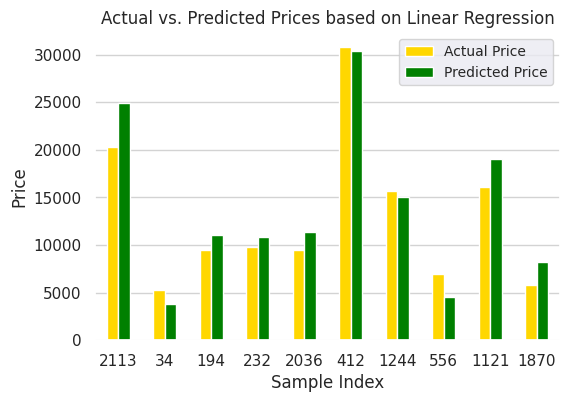

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
actual_color = 'Gold'
predicted_color = 'green'

# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"Actual Price": ytest[:10], "Predicted Price": yhat[:10]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(6, 4), kind="bar", rot=0, color=[actual_color, predicted_color])

# Set plot title and labels
plt.title("Actual vs. Predicted Prices based on Linear Regression")
plt.xlabel("Sample Index")
plt.ylabel("Price")

# Add legend
legend = plt.legend(loc='upper right', fontsize='small')

# Set grid background to white with grey grid lines
ax.set_facecolor('white')
ax.grid(axis='y', color='lightgrey')

# Show the plot
plt.show()


In [ ]:
# Make predictions using the linear regression model for testing data
yhat_test = lin_reg.predict(Xtest)

# Create a DataFrame containing actual and predicted prices for testing data
df_lin_results = pd.DataFrame({"Actual_Price": ytest, "Predicted_Price": yhat_test})

# Display the DataFrame
print(df_lin_results)


      Actual_Price  Predicted_Price
2113  20316.224500     24909.342446
34     5236.110595      3791.867848
194    9438.973067     11101.052375
232    9848.389504     10836.850061
2036   9447.319587     11333.456972
...            ...              ...
1297   6562.689321      8249.536932
1771  19356.838820     20496.828961
1403  20524.615440     21301.712850
1765   6885.603548      5312.921663
1039  20664.958610     21742.357500

[421 rows x 2 columns]


## Decission Tree

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10000,
                                 random_state=7)

rmse_scores = -cross_val_score(tree_reg, Xtrain, ytrain,
                               scoring="neg_root_mean_squared_error",
                               cv=10)

In [ ]:
rmse_scores.mean()

2521.8549966956784

In [ ]:
rmse_scores.std()

232.41680730567953

In [ ]:
# Exhaustive grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
# execution time
from timeit import default_timer as timer
from datetime import timedelta

# silence warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# increase column width
pd.set_option('display.max_colwidth', 100)
start = timer()

# specify the hyperparameters and their values
hp_grid = {
    'max_depth': [2, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'max_leaf_nodes': [5000, 10000, None]
}

tree_reg = DecisionTreeRegressor(random_state=7)

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(tree_reg, hp_grid, cv=10,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True, verbose=2)

grid_search.fit(Xtrain, ytrain)

print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))



Streaming output truncated to the last 5000 lines.
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END max_depth=2, max_leaf_nodes=10000, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV]

In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=7)

In [ ]:
best_estimator = grid_search.best_estimator_

# Extract hyperparameters and their values
hyperparameters = best_estimator.get_params()

# Print hyperparameters and their values
for param, value in hyperparameters.items():
    print(f"{param}: {value}")


ccp_alpha: 0.0
criterion: squared_error
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 50
min_weight_fraction_leaf: 0.0
random_state: 7
splitter: best


In [ ]:
-grid_search.best_score_

2147.177158349383

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
185,"{'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 50}",1805.030570,2147.177158,-18.955169
113,"{'max_depth': 10, 'max_leaf_nodes': 5000, 'min_samples_leaf': 1, 'min_samples_split': 50}",1805.030570,2147.177158,-18.955169
149,"{'max_depth': 10, 'max_leaf_nodes': 10000, 'min_samples_leaf': 1, 'min_samples_split': 50}",1805.030570,2147.177158,-18.955169
479,"{'max_depth': 25, 'max_leaf_nodes': 10000, 'min_samples_leaf': 10, 'min_samples_split': 50}",1876.050252,2148.182920,-14.505617
443,"{'max_depth': 25, 'max_leaf_nodes': 5000, 'min_samples_leaf': 10, 'min_samples_split': 50}",1876.050252,2148.182920,-14.505617
...,...,...,...,...
76,"{'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 40}",3273.518933,3342.286167,-2.100713
77,"{'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 50}",3273.518933,3342.286167,-2.100713
78,"{'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}",3273.518933,3342.286167,-2.100713
67,"{'max_depth': 2, 'max_leaf_nodes': 10000, 'min_samples_leaf': 50, 'min_samples_split': 10}",3273.518933,3342.286167,-2.100713


In [ ]:
# RMSE Training
best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtrain)

final_mse = mean_squared_error(ytrain, yhat)
dtree_final_train_rmse = np.sqrt(final_mse)
dtree_final_train_rmse

1779.4141149585464

In [ ]:
# RMSE Testing
best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
dtree_final_test_rmse = np.sqrt(final_mse)
dtree_final_test_rmse

2129.2353840472347

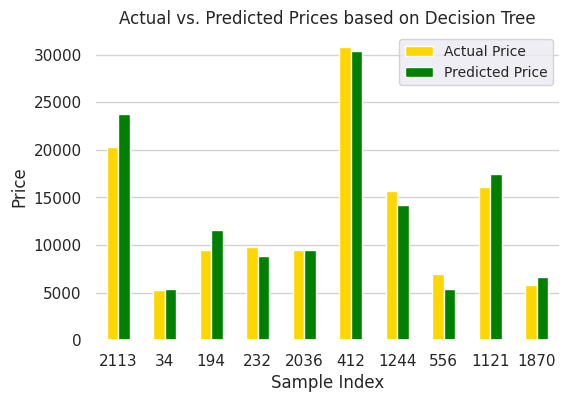

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
actual_color = 'Gold'
predicted_color = 'green'

# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"Actual Price": ytest[:10], "Predicted Price": yhat[:10]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(6, 4), kind="bar", rot=0, color=[actual_color, predicted_color])

# Set plot title and labels
plt.title("Actual vs. Predicted Prices based on Decision Tree")
plt.xlabel("Sample Index")
plt.ylabel("Price")

# Add legend
legend = plt.legend(loc='upper right', fontsize='small')

# Set grid background to white with grey grid lines
ax.set_facecolor('white')
ax.grid(axis='y', color='lightgrey')

# Show the plot
plt.show()


In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculate the predicted price of the car vs the actual price for all samples
df_results = pd.DataFrame({'Actual Price': ytest, 'Predicted Price': yhat})

# Display the entire dataframe
print(df_results)

      Actual Price  Predicted Price
2113  20316.224500     23786.621986
34     5236.110595      5422.973441
194    9438.973067     11539.496879
232    9848.389504      8840.917082
2036   9447.319587      9454.722935
412   30820.202180     30339.247908
1244  15679.819680     14185.827183
556    6994.467501      5422.973441
1121  16101.964640     17514.620893
1870   5847.746663      6678.048777
1122  27535.273680     29077.343314
1541  13185.683630     14185.827183
576   21371.775210     21850.608557
637   30197.690450     31743.445115
1208  29928.816830     29077.343314
2190  11590.703620     12354.363810
861   24571.807510     27288.950779
1151  22461.189970     23786.621986
868   17998.856810     20309.506987
7      6122.786871      6678.048777
635   17869.126400     17876.259350
1362  10338.741290     10745.763443
1677  28974.022730     24843.386730
51     9719.279604      9697.309380
739   21480.551280     21850.608557
1531  11062.807310     11539.496879
1910   4331.533738      4792

In [ ]:
# Analyze important predictors and put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k:.3f}")

monthly_mileage: 0.979
Cylinder_Numbers: 0.010
Age: 0.002
Weight: 0.002
Navigation_Yes: 0.001
Service_History_Partial Service: 0.001
Condition_Fair: 0.001
Fuel_Type_Petrol: 0.001
Service_History_No Service: 0.001
Transmission_Manual: 0.000
Sunroof_Yes: 0.000
Fuel_Type_Hybrid: 0.000
Condition_Good: 0.000


## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from timeit import default_timer as timer

# Assuming Xtrain and ytrain are already defined
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(random_state=7)
rf_hp_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10, 12],
    'max_features': ["sqrt", 0.5],
    'max_samples': [None, 0.5],
    'min_samples_leaf': [1, 2, 4, 6],
}

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=7)
gb_hp_grid = {
    'n_estimators': [100, 200, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 7],
    'min_samples_split': [2, 3, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5],
}

# Combined grid search
estimators = [('Random Forest', rf, rf_hp_grid), ('Gradient Boosting', gb, gb_hp_grid)]
for name, estimator, hp_grid in estimators:
    grid_search = GridSearchCV(estimator, hp_grid, cv=5,
                               scoring="neg_root_mean_squared_error",
                               return_train_score=True, verbose=2)

    start = timer()
    grid_search.fit(X_train, y_train)
    end = timer()

    print(f"{name} - Execution time HH:MM:SS:", timedelta(seconds=end - start))
    print(f"{name} - Best parameters:", grid_search.best_params_)

    # Evaluate the model
    best_model = grid_search.best_estimator_
    train_error = mean_squared_error(y_train, best_model.predict(X_train), squared=False)
    test_error = mean_squared_error(y_test, best_model.predict(X_test), squared=False)
    print(f"{name} - Training RMSE:", train_error)
    print(f"{name} - Testing RMSE:", test_error)


Streaming output truncated to the last 5000 lines.
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END max_depth=40, max_features=0.5, max_samples=0.5, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total tim

In [ ]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_leaf=3,
                          min_samples_split=8, n_estimators=500,
                          random_state=7)

In [ ]:
-grid_search.best_score_

1871.1459225424162

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
98,"{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estima...",-1.399766e+03,-1871.145923,-3.367565e+01
94,"{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estima...",-1.398241e+03,-1872.911197,-3.394764e+01
86,"{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estima...",-1.398241e+03,-1872.911197,-3.394764e+01
90,"{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estima...",-1.398241e+03,-1872.911197,-3.394764e+01
82,"{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estima...",-1.398241e+03,-1872.911197,-3.394764e+01
158,"{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estima...",-1.212301e+03,-1872.949859,-5.449546e+01
178,"{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estima...",-1.242825e+03,-1873.622236,-5.075509e+01
174,"{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estima...",-1.242825e+03,-1873.622236,-5.075509e+01
170,"{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estima...",-1.242825e+03,-1873.622236,-5.075509e+01
166,"{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estima...",-1.242825e+03,-1873.622236,-5.075509e+01


In [ ]:
# RMSE Training
best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtrain)

Rf_final_train_mse = mean_squared_error(ytrain, yhat)
Rf_final_train_rmse = np.sqrt(Rf_final_train_mse)
Rf_final_train_rmse

1639.382996560776

In [ ]:
# RMSE Testing
best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
Rf_final_test_rmse = np.sqrt(final_mse)
Rf_final_test_rmse

1969.7739091180592

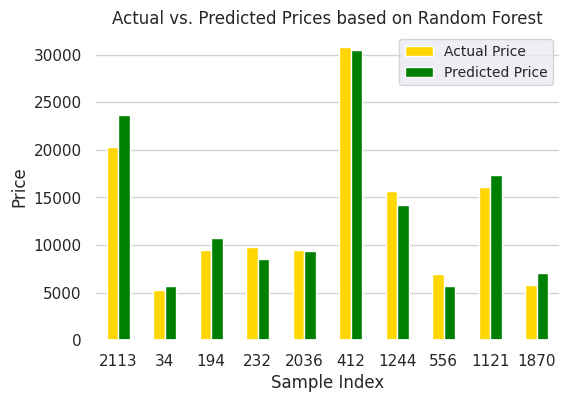

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
actual_color = 'Gold'
predicted_color = 'green'

# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"Actual Price": ytest[:10], "Predicted Price": yhat[:10]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(6, 4), kind="bar", rot=0, color=[actual_color, predicted_color])

# Set plot title and labels
plt.title("Actual vs. Predicted Prices based on Random Forest")
plt.xlabel("Sample Index")
plt.ylabel("Price")

# Add legend
legend = plt.legend(loc='upper right', fontsize='small')

# Set grid background to white with grey grid lines
ax.set_facecolor('white')
ax.grid(axis='y', color='lightgrey')

# Show the plot
plt.show()


In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculate the predicted price of the car vs the actual price for all samples
df_results = pd.DataFrame({'Actual Price': ytest, 'Predicted Price': yhat})

# Display the entire dataframe
print(df_results)


      Actual Price  Predicted Price
2113  20316.224500     23678.942324
34     5236.110595      5664.396218
194    9438.973067     10781.533997
232    9848.389504      8487.289258
2036   9447.319587      9426.639904
412   30820.202180     30470.270598
1244  15679.819680     14243.244543
556    6994.467501      5705.659226
1121  16101.964640     17332.158369
1870   5847.746663      7110.885607
1122  27535.273680     28604.403653
1541  13185.683630     13538.221868
576   21371.775210     21039.368339
637   30197.690450     29484.481350
1208  29928.816830     27235.033119
2190  11590.703620     12175.038361
861   24571.807510     26218.916386
1151  22461.189970     23975.169260
868   17998.856810     20505.340799
7      6122.786871      7169.613844
635   17869.126400     18211.681117
1362  10338.741290     10469.763590
1677  28974.022730     24129.368584
51     9719.279604     10227.812288
739   21480.551280     21688.119827
1531  11062.807310     11804.545947
1910   4331.533738      5055

## Gradient Boosting

In [ ]:
# RMSE Training
best_model = grid_search.best_estimator_

yhat = best_model.predict(X_train)

gb_final_train_mse = mean_squared_error(y_train, yhat)
gb_final_train_rmse = np.sqrt(gb_final_train_mse)
gb_final_train_rmse

1461.2532178040628

In [ ]:
# RMSE Testing
best_model = grid_search.best_estimator_

yhat = best_model.predict(X_test)

gb_final_mse = mean_squared_error(y_test, yhat)
gb_final_test_rmse = np.sqrt(gb_final_mse)
gb_final_test_rmse


2212.512131313194

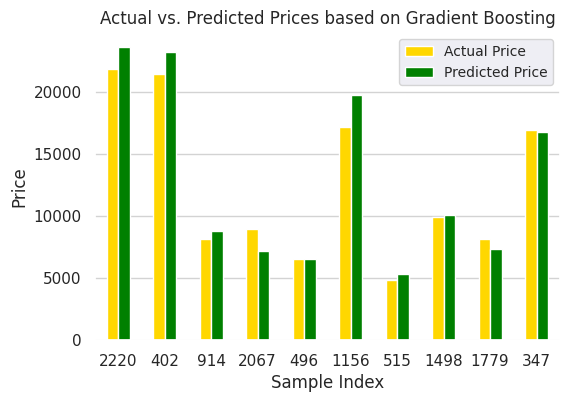

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
actual_color = 'Gold'
predicted_color = 'green'

# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"Actual Price": y_test[:10], "Predicted Price": yhat[:10]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(6, 4), kind="bar", rot=0, color=[actual_color, predicted_color])

# Set plot title and labels
plt.title("Actual vs. Predicted Prices based on Gradient Boosting")
plt.xlabel("Sample Index")
plt.ylabel("Price")

# Add legend
legend = plt.legend(loc='upper right', fontsize='small')

# Set grid background to white with grey grid lines
ax.set_facecolor('white')
ax.grid(axis='y', color='lightgrey')

# Show the plot
plt.show()


In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculate the predicted price of the car vs the actual price for all samples
df_results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': yhat})

# Display the entire dataframe
print(df_results)


      Actual Price  Predicted Price
2220  21821.113930     23586.978799
402   21410.244110     23205.057685
914    8133.902056      8745.681483
2067   8938.394090      7144.114112
496    6521.006599      6515.512230
1156  17129.356770     19718.010125
515    4847.201479      5365.219686
1498   9945.603430     10094.838969
1779   8173.148106      7347.884999
347   16881.163060     16741.586133
935   16145.540570     16608.536633
326    7051.905860      5798.846668
927    9708.728481      9102.997504
2188  16069.029710     17828.758918
1196  24972.753480     24682.781322
1344  41937.871400     43780.893426
609   22026.900750     21517.492767
2157   9266.941878      9024.442038
612   35309.051370     26055.395989
980    6338.457039      6715.491746
1448  19149.398430     23308.247476
1525   4619.300173      6381.030065
48    25672.083950     24184.789748
924    6095.136158      7156.071117
1163   9707.615658      9728.720850
1589   7691.199716      7590.926135
1563   5728.204875      6943

## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your training and testing data Xtrain, Xtest, ytrain, ytest

# Create and configure the MLPRegressor model
nn_reg = MLPRegressor(hidden_layer_sizes=(150, 100), activation='relu', solver='adam',
                      alpha=0.0001, learning_rate='adaptive', max_iter=1500, random_state=7)

# Train the model
nn_reg.fit(Xtrain, ytrain)

# Make predictions on the training set
yhat_train_nn = nn_reg.predict(Xtrain)

# Calculate the mean squared error on the training set
train_mse_nn = mean_squared_error(ytrain, yhat_train_nn)

# Calculate the root mean squared error on the training set
train_rmse_nn = np.sqrt(train_mse_nn)

# Make predictions on the testing set
yhat_test_nn = nn_reg.predict(Xtest)

# Calculate the mean squared error on the testing set
test_mse_nn = mean_squared_error(ytest, yhat_test_nn)

# Calculate the root mean squared error on the testing set
test_rmse_nn = np.sqrt(test_mse_nn)

print("Training RMSE:", train_rmse_nn)
print("Testing RMSE:", test_rmse_nn)


Training RMSE: 1904.3570641119748
Testing RMSE: 2099.8311519173753


In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
actual_color = 'Gold'
predicted_color = 'green'

# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"Actual Price": ytest[:10], "Predicted Price": yhat_test_nn[:10]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(6, 4), kind="bar", rot=0, color=[actual_color, predicted_color])

# Set plot title and labels
plt.title("Actual vs. Predicted Prices based on Neural Network")
plt.xlabel("Sample Index")
plt.ylabel("Price")

# Add legend
legend = plt.legend(loc='upper right', fontsize='small')

# Set grid background to white with grey grid lines
ax.set_facecolor('white')
ax.grid(axis='y', color='lightgrey')

# Show the plot
plt.show()


In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculate the predicted price of the car vs the actual price for all samples
df_results = pd.DataFrame({'Actual Price': ytest, 'Predicted Price': yhat_test_nn})

# Display the entire dataframe
print(df_results)

## Accuracy Rate - Training (RMSE)

In [ ]:
# percentage difference of each model's RMSE compared to the baseline
RMSE_Fi = {
    'Base Line RMSE': [baseline_train_rmse],
    'Linear Regression': [lin_train_rmse],
    'Decision Tree' : [tree_train_rmse],
    'Decision Tree Final': [dtree_final_train_rmse],
    'Random Forest' : [Rf_train_rmse],
    'Random Forest Final': [Rf_final_train_rmse],
    'Gradient Boosting' : [gb_final_train_rmse],
    'Neural Network' : [train_rmse_nn]
}

rmse_fi_df = pd.DataFrame(RMSE_Fi).transpose()
rmse_fi_df.columns = ['RMSE_Traing_Fi']

# Calculate percentage difference with baseline
rmse_fi_df['Vs Baseline_train'] = 100 * (baseline_train_rmse - rmse_fi_df['RMSE_Traing_Fi']) / baseline_train_rmse

print(rmse_fi_df)

# Accuracy Rate - Testing (RMSE)

In [ ]:
# percentage difference of each model's RMSE compared to the baseline
RMSE_Fi = {
    'Base Line RMSE': [baseline_test_rmse],
    'Linear Regression': [lin_test_rmse],
    'Decision Tree' : [tree_test_rmse],
    'Decision Tree Final': [dtree_final_test_rmse],
    'Random Forest' : [Rf_test_rmse],
    'Random Forest Final': [Rf_final_test_rmse],
    'Gradient Boosting' : [gb_final_test_rmse],
    'Neural Network' : [test_rmse_nn]
}

rmse_fi_df = pd.DataFrame(RMSE_Fi).transpose()
rmse_fi_df.columns = ['RMSE_Test_Fi']

# Calculate percentage difference with baseline
rmse_fi_df['Vs Baseline_test'] = 100 * (baseline_test_rmse - rmse_fi_df['RMSE_Test_Fi']) / baseline_test_rmse

print(rmse_fi_df)

                     RMSE_Test_Fi  Vs Baseline_test
Base Line RMSE        8453.057133          0.000000
Linear Regression     2248.775065         73.396902
Decision Tree         2437.454874         71.164812
Decision Tree Final   2129.235384         74.811061
Random Forest         2010.673945         76.213648
Random Forest Final   1969.773909         76.697497
Gradient Boosting     2212.512131         73.825894
Neural Network        2099.831152         75.158914
                     RMSE_Test_Fi  Vs Baseline_test
Base Line RMSE        8453.057133          0.000000
Linear Regression     2248.775065         73.396902
Decision Tree         2437.454874         71.164812
Decision Tree Final   2129.235384         74.811061
Random Forest         2010.673945         76.213648
Random Forest Final   1969.773909         76.697497
Gradient Boosting     2212.512131         73.825894
Neural Network        2099.831152         75.158914
